# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>The dataset contains information about 10,000 movies collected from The Movie Database (TMDb).<br>
It includes
- ‘id’ - record id.
- ‘imdb_id’ - unique identifier for the movie on IMDB.
- ‘popularity’ - movie popularity.
- ‘budget’ - movie budget value.
- ‘revenue’ - movie profit value.
- ‘original_title’ - movie title.
- ‘cast’ - movie cast.
- ‘homepage’ - movie page.
- ‘director’ - movie director.
- ‘tagline’ -  clarify movie idea.
- ‘keywords’ - classify movie content.
- ‘overview’ - movie overview.
- ‘runtime’ - movie runtime.
- ‘genres’ - movie categories.
- ‘production_companies’ - movie production companies.
- ‘release_date’ and ‘release_year’ - movie release date and year.
- ‘vote_count’ and ‘vote_average’ - movie vote count and vote average.
- ‘budget_adj‘ and ‘revenue_adj‘ - budget and revenue of the associated movie in terms of 2010 dollars.<br><br>
>Columns, ‘cast’,‘keywords’,‘genres’and ‘production_companies’, contain multiple values separated by pipe (|) character.



### Questions for Analysis
• What is the movie industry growth over the years?<br>
• What are top 10 highest-revenue movies?<br>
• Which genres are most popular over the years?<br>
• How far the release date has an effect on the revenue?<br>
• Is there a relation between budget and revenue?<br>
• Is there a relation between vote and popularity?<br>

In [27]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [28]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [29]:
# Load data and print out a few rows
df_data = pd.read_csv('/home/workspace/Database_TMDb_movie_data/tmdb-movies.csv')
df_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [30]:
# View details of movie data.
df_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [31]:
# Print a summary of data columns
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [32]:
# Columns have missing data.
df_data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [33]:
# Columns have zero values
(df_data == 0).sum(axis=0) 

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [34]:
# Rows with NaN values in all columns.
df_data[df_data.isna().all(axis=1)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [35]:
# Check duplicate data
df_data.duplicated().sum()

1


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [36]:
# Copy original data
df_cleaned = df_data.copy()

In [37]:
# Drop columns not used in this analysis and have a lot of missing values.
#    ['id', 'imdb_id', 'director','overview','vote_average','production_companies','homepage', 'tagline', 'keywords']
#    ['budget_adj','revenue_adj'] - the budget and revenue of the associated movie in terms of 2010 dollars, 
#    accounting for inflation over time. Only 'budget' and 'revenue' will be used in the analysis.

df_cleaned.drop(['id','imdb_id', 'director','overview','vote_average','production_companies','budget_adj','revenue_adj','homepage', 'tagline', 'keywords'], axis=1, inplace=True)
# Reorder columns
df_cleaned = df_cleaned.iloc[:,[3,4,6,0,1,2,5,8,7,9]]
df_cleaned.head(3)

,original_title,cast,genres,popularity,budget,revenue,runtime,vote_count,release_date,release_year
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,32.985763,150000000,1513528810,124,5562,6/9/15,2015
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,28.419936,150000000,378436354,120,6185,5/13/15,2015
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,13.112507,110000000,295238201,119,2480,3/18/15,2015


In [38]:
# Drop duplicate records
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.duplicated().sum()

0

##### Missing Values

In [39]:
# This step is to decide whether to drop or fill rows with missing values in columns that will be used in the analysis.
df_cleaned.isna().sum()

original_title     0
cast              76
genres            23
popularity         0
budget             0
revenue            0
runtime            0
vote_count         0
release_date       0
release_year       0
dtype: int64

In [40]:
# Number of rows with missing values.
df_mis_rows = df_cleaned[df_cleaned.isna().any(axis=1)]
df_mis_rows.shape[0]

98

In [41]:
# View details of these rows.
df_mis_rows.describe()

,popularity,budget,revenue,runtime,vote_count,release_year
count,98.000000,9.800000e+01,9.800000e+01,98.000000,98.000000,98.000000
mean,0.154419,2.281767e+05,3.623691e+05,64.540816,26.479592,2005.540816
std,0.149797,9.498792e+05,3.375625e+06,53.427891,23.705769,11.840145
min,0.001662,0.000000e+00,0.000000e+00,0.000000,10.000000,1967.000000
25%,0.038304,0.000000e+00,0.000000e+00,8.000000,12.000000,2005.000000
50%,0.104458,0.000000e+00,0.000000e+00,74.500000,16.000000,2010.000000
75%,0.225094,0.000000e+00,0.000000e+00,96.000000,31.250000,2013.000000
max,0.664023,7.000000e+06,3.340000e+07,360.000000,154.000000,2015.000000


In [42]:
# As 75% of rows with zero values in main features 'budget' and 'revenue'.
#   also number of the rows is '98' so decided to drop these rows.
df_cleaned = df_cleaned.dropna()
df_cleaned.shape

(10767, 10)

##### Columns Updates

In [43]:
# Cast column to an appropriate dtype
#   Convert 'release_date' to datetime type.  
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'])
#   Convert 'cast','genres' to string type
df_cleaned[['cast','genres']] = df_cleaned[['cast','genres']].astype(str)

In [44]:
# Create new column 'month' from 'release_date' columns.
#   'month' col will be used in answering Question no.4.
df_cleaned['release_month'] = pd.DatetimeIndex(df_cleaned['release_date']).month
# Drop 'release_date' column it isn't needed anymore.
df_cleaned.drop(columns=['release_date'],inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

##### Functions
> Create hybrid_col_values(),vbar_chart() and hbar_chart() functions to reduce repetitive code.

In [45]:
def hybrid_col_values(delm_char,col_name,dataframe):
    '''
    Returns result of dataframe explode.
      Parameters:
         delm_char (string): delimiter character.
         col_name (string): column with hybrid values separated by delm_char.
         dataframe (pandas dataframe): dataframe of data
      Returns:
         dataframe (pandas dataframe): dataframe result.
    '''
    dataframe[col_name] = dataframe[col_name].apply(lambda x:  x.split(delm_char))
    dataframe = dataframe.explode(col_name)
    # After dataframe explode function, rows become with duplicate indices. so reset_index of dataframe 
    dataframe = dataframe.reset_index(drop=True)
    return dataframe

In [46]:
def vbar_chart(x,y,chart_title,xlabel,ylabel):
    '''
    Generate vertical bar plot.
      Parameters:
         x (list): list of x_axis values.
         y (list): list of y_axis values.
         chart_title (string): figure title.
         xlabel (string): x_axis label.
         ylabel (string): y_axis label.
    '''
    plt.bar(x, y)
    plt.title(chart_title, fontsize=10)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12);

In [47]:
def hbar_chart(xcol,ycol,chart_title,xlabel):
    '''
    Generate horizontal bar plot.
      Parameters:
         xcol (pandas series): contains x_axis values.
         ycol (pandas series): contains y_axis values.
         chart_title (string): figure title.
         xlabel (string): x_axis label.
    '''
    # Set chart size
    plt.subplots(figsize=(9,7))
    # To prevent alphabetical sorting for bars with matplotlib.
    #   use numbers instead of string , then set the yticks and labels to the correct values.
    plt.barh(range(len(xcol)),xcol,0.5)
    plt.yticks(range(len(ycol)),ycol);
    # Set chart title
    plt.title(chart_title, fontsize=10)
    # Label the x-axis
    plt.xlabel(xlabel, fontsize=12)

In [48]:
# Copy cleaned dataframe
df_analysis = df_cleaned.copy()
df_analysis.head(3)

,original_title,cast,genres,popularity,budget,revenue,runtime,vote_count,release_year,release_month
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,32.985763,150000000,1513528810,124,5562,2015,6
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,28.419936,150000000,378436354,120,6185,2015,5
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,13.112507,110000000,295238201,119,2480,2015,3


### Research Question 1 (What is the movie industry growth over the years?)

The Movie Industry, like other industries, has an impact on countries.
This industry has an economic and cultural impact.
so there is a need to know the growth of this industry over the years.


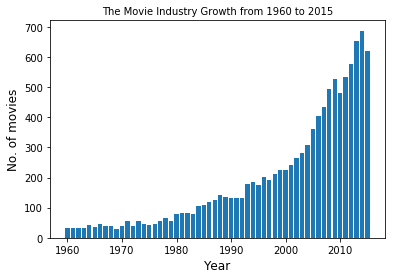

In [49]:
# Count movies were produced per year.
movies_count = df_analysis['release_year'].value_counts().sort_values(ascending=False)
# Chart title
chart_title = 'The Movie Industry Growth from {} to {}'.format(movies_count.index.min(), movies_count.index.max())
# Plot data using vertical bar chart
vbar_chart(movies_count.index.tolist(), movies_count.tolist(),chart_title,'Year','No. of movies')

According to the previous chart, the growth was normally increasing until 2000.
After that it increased at a greater rate. That means the investment has increased in this industry.

### Research Question 2  (What are the top 10 highest-revenue movies?)

The main goal of any company is maximize revenue. so taking a look over cases with 'highest-revenue' can help.

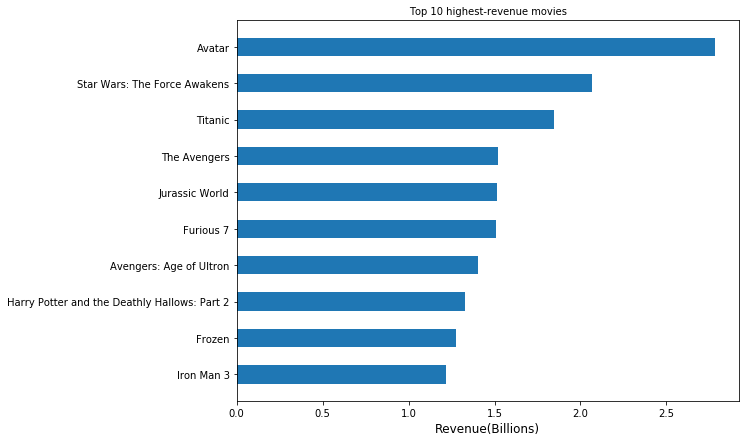

In [50]:
# Sort dataframe by 'revenue'. 
df_high_revenue = df_analysis.sort_values(['revenue']).tail(10)
# Most of 'revenue' values exceed one billion that make x_axis values not human-readable. 
#   so divide 'revenue' col by one billion.
df_high_revenue['revenue'] = df_high_revenue['revenue']/1000000000
df_high_revenue.reset_index(drop=True,inplace=True)
# Plot data using vertical bar chart
hbar_chart(df_high_revenue['revenue'],df_high_revenue['original_title'],'Top 10 highest-revenue movies','Revenue(Billions)')

According to the previous chart, 'Avatar', 'Star Wars: The force Awakens' and 'Titanic' are the highest-revenue movies.
As a result,  oftenly movies with non repetitive stories make high revenue.

### Research Question 3  (Which genres are most popular over the years?)

'Most popular' means the safe side. As a company produces its first movie, it's good to know which genres are most popular to be in the safe side.

In [69]:
# Column 'genres' contain more than one value separated by '|'.
#   so there is a need to take each row and split their values into new rows.
#   copy anaylsis_datframe to avoid unwanted operations on basic dataframe used for analysis.
df_analysis_q3 = df_analysis.copy()
df_analysis_q3.head(3)

,original_title,cast,genres,popularity,budget,revenue,runtime,vote_count,release_year,release_month
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,32.985763,150000000,1513528810,124,5562,2015,6
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,28.419936,150000000,378436354,120,6185,2015,5
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,13.112507,110000000,295238201,119,2480,2015,3


In [70]:
# Split 'genres' hybrid values into new rows.
df_analysis_q3 = hybrid_col_values('|','genres',df_analysis_q3)

In [71]:
# Group movies by genres then get 'popularity' sum for each genre.
df_popular_genre = df_analysis_q3.groupby('genres')['popularity'].sum()
df_popular_genre= df_popular_genre.sort_values().to_frame()
df_popular_genre.reset_index(level=0, inplace=True)

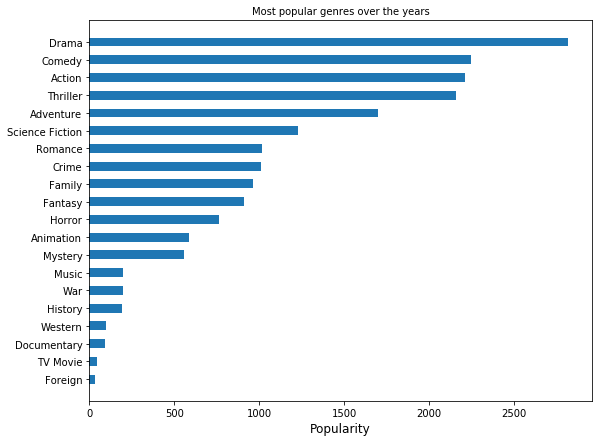

In [72]:
# Plot data using horizontal bar chart
hbar_chart(df_popular_genre['popularity'],df_popular_genre['genres'],'Most popular genres over the years','Popularity')

According to the previous chart, 'Drama' is the most popular genre over the years.

### Research Question 4  (How far the release date has an effect on the revenue?)

Movie Revenue depends on a range of factors.
This step to check how far release date has an effect on revenue.

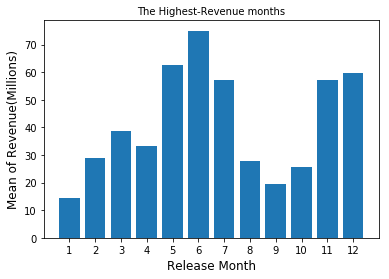

In [73]:
# Copy anaylsis_datframe to avoid unwanted operations on basic dataframe used for analysis.
df_analysis_q3 = df_analysis.copy()
df_analysis_q4 = df_analysis.copy()
# Divide 'revenue' col by one million.
df_analysis_q4['revenue'] = df_analysis_q4['revenue']/1000000
# Group movies by 'release_month' then get mean of month revenue.
df_month =  df_analysis_q4.groupby(['release_month'])['revenue'].mean()
df_month_sorted= df_month.sort_values(ascending=False)
# Set the xticks and labels to the correct month values.
plt.xticks(df_month_sorted.index, df_month_sorted.index)
vbar_chart(df_month_sorted.index, df_month_sorted,'The Highest-Revenue months','Release Month','Mean of Revenue(Millions)')

According to the previous chart, 'June' month has the highest-revenue.
Revenue increases in [May,June] Summer Months and [November,December] 'Thanksgiving, Christmas and New Year’s' months.
As a result, release date make a difference in revenue.

### Research Question 5  (Is there a relation between budget and revenue?)?

This step is to check if budget has an effect on revenue.

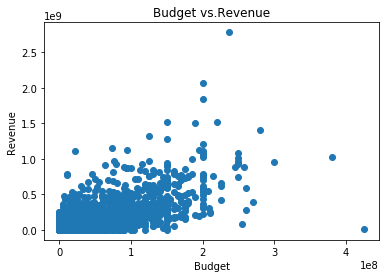

In [74]:
# Observe relationships between two numeric variables using scatter plot.
# Plot 'budget' and 'revenue'
plt.scatter(df_analysis['budget'],df_analysis['revenue'])
plt.title("Budget vs.Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

According to the previous chart, there is a weak correlation between budget and revenue. Means it isn't necessary that a high-budget movie will have high revenue.

### Research Question 6 (Is there a relation between vote and popularity?)

This step is to check if votes increases based on popularity as in elections.

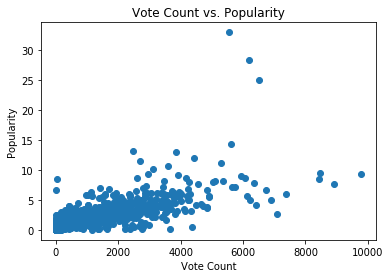

In [75]:
# Observe relationships between two numeric variables using scatter plot.
# Plot 'vote count' and 'popularity' 
plt.scatter(df_analysis['vote_count'],df_analysis['popularity'])
plt.title("Vote Count vs. Popularity")
plt.xlabel("Vote Count")
plt.ylabel("Popularity")
plt.show()

According to the previous chart, there is a positive correlation between vote and popularity.Means as the popularity increases, votes increase.

<a id='conclusions'></a>
## Conclusions

* In general, the movie industry growth increases over the years. Year '2014' has the most number of movies.
* 'Avatar', 'Star Wars: The force Awakens' and 'Titanic' are the highest-revenue movies.
* 'Drama' is the most popular genre over the years.
* 'June' month has the highest-revenue.<br>
   Revenue increases in  [May,June] Summer Months and  [November,December] 'Thanksgiving, Christmas and New Year’s' months.
* There is a weak correlation between budget and revenue. 
* There is a positive correlation between vote and popularity. 

### Limitations

* Half rows of the dataset have 'budget' and 'revenue' with zero values.<br> 
  Maybe that affects on the 'budget' and 'revenue' relation.
  
* Combined genres data is a bit misleading.<br>
  There are some rows with 'Action|Adventure' and others have 'Adventure|Action'.<br> 
  The first value of genre represents the main category of movie or the two values are the same.

In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0